In [1]:
# classifier and attacker
# dataset: mnist
# author: Ying Meng

# ---------------------
# import required packages
# ---------------------
from __future__ import division, absolute_import, print_function
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist
from tensorflow.keras import layers, models
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from cleverhans.evaluation import batch_eval
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.
W0710 21:22:25.646264 140036047902464 deprecation_wrapper.py:119] From /home/rabina7/anaconda3/envs/opencv/lib/python2.7/site-packages/cleverhans/utils_tf.py:341: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.



In [2]:
# parameters
IMG_ROW = 28
IMG_COL = 28
LR = 0.001
BATCH_SIZE = 128
VAL_RATE = 0.2

In [3]:
'''
Load data
@author: Ying Meng (y.meng201011(at)gmail(dot)com)
'''
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, IMG_ROW, IMG_COL, 1)
X_test = X_test.reshape(-1, IMG_ROW, IMG_COL, 1)
# cast pixels to floats, normalize to [0, 1] range
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot-encode the labels
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

nb_train = int(len(X_train) * VAL_RATE)
train_samples = X_train[:-nb_train]
train_classes = Y_train[:-nb_train]
val_samples = X_train[-nb_train:]
val_classes = Y_train[-nb_train:]

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


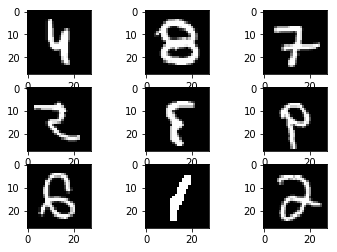

In [4]:
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, Y_train, batch_size=9):
    # create a grid of 3x3 image
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

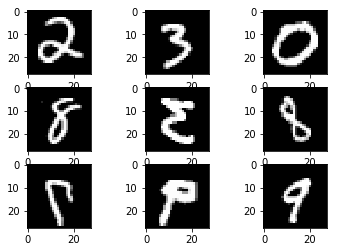

In [5]:
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True)
# fit parameters from data
datagen.fit(X_test)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_test, Y_test, batch_size=9):
    # create a grid of 3x3 image
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

In [6]:
'''
Define model structures for some datasets.
@author: Ying Meng (y.meng201011(at)gmail(dot)com)
'''
# Set random seed
np.random.seed(0)

# datasets
DATASETS = ['mnist', 'cifar']

def cnn(dataset='mnist'):
    """
    Takes in a parameter indicating which model type to use ('mnist', or
    'cifar') and returns the appropriate Keras model.
    :param dataset: A string indicating which dataset we are building
                    a model for.
    :return: The model; a Keras 'Sequential' instance.
    """
    assert dataset in DATASETS, "dataset parameter must be either 'mnist' or 'cifar'"

    if dataset == 'mnist':
        # MNIST model
        struct = [
            layers.Conv2D(32, (3, 3), input_shape = (IMG_ROW, IMG_COL, 1)),
            layers.Activation('relu'),
            layers.MaxPooling2D(pool_size = (2, 2)),

            layers.Conv2D(64, (3, 3)),
            layers.Activation('relu'),
            layers.MaxPooling2D(pool_size = (2, 2)),

            layers.Flatten(),
            layers.Dense(64 * 64),
            layers.Dropout(rate = 0.4),
            layers.Dense(10),
            layers.Activation('softmax')
        ]
    elif dataset == 'cifar':
        # CIFAR-10 model
        raise NotImplementedError('Not ready yet.')

    model = models.Sequential()
    for layer in struct:
        model.add(layer)

    return model

In [7]:
# Define the model
model = cnn('mnist')
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', metrics = ['accuracy'])
# Train the model
model.fit(train_samples, train_classes, epochs = 15,
          batch_size = BATCH_SIZE, shuffle = True,
          verbose = 1, validation_data = (val_samples, val_classes))

# Save the model
model.save("data/mnist_rotate90_cnn.h5")
print("Trained model has been saved to data/ \subfolder")

W0710 21:22:27.289639 140036047902464 deprecation.py:506] From /home/rabina7/anaconda3/envs/opencv/lib/python2.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 44s 911us/sample - loss: 0.1538 - acc: 0.9515 - val_loss: 0.0609 - val_acc: 0.9814
Epoch 2/15
48000/48000 [==============================] - 32s 659us/sample - loss: 0.0497 - acc: 0.9849 - val_loss: 0.0503 - val_acc: 0.9847
Epoch 3/15
48000/48000 [==============================] - 32s 664us/sample - loss: 0.0365 - acc: 0.9887 - val_loss: 0.0426 - val_acc: 0.9878
Epoch 4/15
48000/48000 [==============================] - 34s 709us/sample - loss: 0.0281 - acc: 0.9908 - val_loss: 0.0556 - val_acc: 0.9839
Epoch 5/15
48000/48000 [==============================] - 34s 699us/sample - loss: 0.0236 - acc: 0.9921 - val_loss: 0.0567 - val_acc: 0.9846
Epoch 6/15
48000/48000 [==============================] - 31s 649us/sample - loss: 0.0213 - acc: 0.9927 - val_loss: 0.0461 - val_acc: 0.9870
Epoch 7/15
48000/48000 [==============================] - 31s 642us/sample - loss: 0.0171 - acc: 0.9942 

In [8]:
# Load the trained model
model = load_model("data/mnist_horizontalflip_cnn.h5")

_, acc = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = 0)
print ('test acc: {}'.format(100 * acc))
#calculating confidence
pred_prob = model.predict(X_test)
pred_label = np.argmax(pred_prob, axis = 1)
conf = np.max(pred_prob, axis = 1)
true_labels = np.argmax(Y_test,axis=1)
confidence = 0
error_conf = 0
num_tests = len(pred_prob)
for i in range(num_tests):
    if (true_labels[i] == pred_label[i]):
        confidence += np.max(pred_prob[i])
    else:
        error_conf+= np.max(pred_prob[i])
total_samples = (confidence + error_conf)
print("totalsamples:" + str(total_samples))
print("predicate class: {}, confidence: {}, missclassified: {} ".format(pred_label, confidence, error_conf))
averageconf = (100 * confidence/ total_samples)
missclassified = (100 * error_conf/ total_samples)
print("misconf: " + str(missclassified))
print("confidence: " + str(averageconf))

W0710 21:30:43.495851 140036047902464 deprecation.py:506] From /home/rabina7/anaconda3/envs/opencv/lib/python2.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0710 21:30:43.498187 140036047902464 deprecation.py:506] From /home/rabina7/anaconda3/envs/opencv/lib/python2.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


test acc: 98.6599981785
totalsamples:9960.711963325739
predicate class: [7 2 1 ... 4 5 6], confidence: 9843.97280392, missclassified: 116.739159405 
misconf: 1.1719961367726766
confidence: 98.82800386322732


In [9]:
def fgsm(x, prediction, epsilon, y = None):
    '''
    Define the symbolic FGSM fitting tf framework
    Ying Meng
    '''
    if y is None:
        y = tf.to_float(tf.equal(prediction, 
                                tf.reduce_max(prediction, 1, keepdims = True)))
        
    y /= tf.reduce_sum(y, 1, keepdims = True)
    
    logits, = prediction.op.inputs
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = y))

    
    grad, = tf.gradients(loss, x)
    perturbation = epsilon * tf.sign(grad)
    adv_sample = tf.stop_gradient(x + perturbation)
    
    return adv_sample

test acc (on original): 0.989799976349


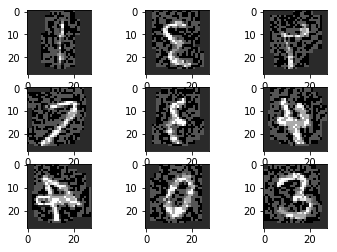

test acc (on adversarial): 0.309199988842 - (epsilon: 0.25)
adversarial examples were generated and saved to data/ \subfolder


In [10]:
# Create TF session
sess = tf.Session()
K.set_session(sess)
K.set_learning_phase(0)

# define tf placeholders and operations
x = tf.placeholder(tf.float32, shape = (None,) + X_test.shape[1:])
y = tf.placeholder(tf.float32, shape = (None,) + Y_test.shape[1:])

# load model
model = load_model("data/mnist_cnn.h5")

# model accuracy
_, acc_original = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = 0)
print('test acc (on original): {}'.format(acc_original))

# symbolic fgsm
epsilon = 0.25
x_adv = fgsm(x, model(x), epsilon = epsilon, y = y)

# craft adversarial examples
X_adv, = batch_eval(sess, [x, y], [x_adv], [X_test, Y_test], batch_size = BATCH_SIZE)
# define data preparation
datagen = ImageDataGenerator(horizontal_flip= True)
# fit parameters from data
datagen.fit(X_adv)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_adv, Y_test, batch_size=9):
    # create a grid of 3x3 image
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break
# test accuracy on adversarial examples
_, acc_adv = model.evaluate(X_adv, Y_test, batch_size = BATCH_SIZE, verbose = 0)
print ('test acc (on adversarial): {} - (epsilon: {})'.format(acc_adv, epsilon))

# save the generated adversarial examples
np.save("data/adv_mnist_fgsm_eps25.npy", X_adv)
print('adversarial examples were generated and saved to data/ \subfolder')
#sess.close()

In [12]:
# Error Rate
# 1. load the model
model = load_model("data/mnist_rotate90_cnn.h5")
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
Y_test=Y_test.reshape((10000,1))
X_test=X_test.reshape((10000,28,28,1))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_test = np_utils.to_categorical(Y_test, 10)
_, acc_original = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = 0)
print('test acc (on original): {}'.format(acc_original))
# 2. load the adversarial examples
X_adv, = batch_eval(sess, [x, y], [x_adv], [X_test, Y_test], batch_size = BATCH_SIZE)
_, acc_adv = model.evaluate(X_adv, Y_test, batch_size = BATCH_SIZE, verbose = 0)
print ('test acc (on adversarial): {} - (epsilon: {})'.format(acc_adv, epsilon))
adv_pred = model.predict(X_adv)
ori_pred = model.predict(X_test)
total_count = 0
error_count = 0
miss = 0
confidence = 0
adv_predict_labels = np.argmax(adv_pred,axis=1)
ori_predict_labels = np.argmax(ori_pred,axis=1)
true_labels = np.argmax(Y_test,axis=1)
conf = np.max(adv_pred)
num_tests = len(ori_pred)
for i in range(num_tests):
    # this means the original model could classify test sample i correctly
    if (ori_predict_labels[i] == true_labels[i]):
        total_count += 1
    # this means the original model classify the adversarial example
    # (test sample i + perturbation) into some label but not "i".
    # That is, the attack is successful and the model fails in this case.
    if (adv_predict_labels[i] != true_labels[i]):
        error_count += 1
    if(adv_predict_labels[i] == true_labels[i]):
        
        confidence += np.max(adv_pred[i])
        
    else:
        miss+= np.max(adv_pred[i])

    print("predicate class: {}, True label: {}, totaladv: {}, counter: {}, confidence: {}, missclassified:{}".format(adv_predict_labels[i], true_labels[i], total_count, error_count, confidence, miss))
total_samples = (miss + confidence)
averageconf = (1.0 * confidence/ total_samples)
print("confidence: " + str(averageconf))
missclassified = (1.0 * miss/ total_samples)
print("miss_conf: " + str( missclassified))
error_rate = (1.0 * error_count/total_count)
print("error rate is: " + str(error_rate))

test acc (on original): 0.987399995327
test acc (on adversarial): 0.669499993324 - (epsilon: 0.25)
predicate class: 2, True label: 7, totaladv: 1, counter: 1, confidence: 0, missclassified:0.421427488327
predicate class: 2, True label: 2, totaladv: 2, counter: 1, confidence: 0.99974745512, missclassified:0.421427488327
predicate class: 1, True label: 1, totaladv: 3, counter: 1, confidence: 1.98066848516, missclassified:0.421427488327
predicate class: 0, True label: 0, totaladv: 4, counter: 1, confidence: 2.97967481613, missclassified:0.421427488327
predicate class: 4, True label: 4, totaladv: 5, counter: 1, confidence: 3.85084009171, missclassified:0.421427488327
predicate class: 1, True label: 1, totaladv: 6, counter: 1, confidence: 4.69106185436, missclassified:0.421427488327
predicate class: 8, True label: 4, totaladv: 7, counter: 2, confidence: 4.69106185436, missclassified:1.42141020298
predicate class: 9, True label: 9, totaladv: 8, counter: 2, confidence: 5.60261434317, missclas

predicate class: 0, True label: 6, totaladv: 2979, counter: 1154, confidence: 1722.26467261, missclassified:914.937717065
predicate class: 8, True label: 9, totaladv: 2980, counter: 1155, confidence: 1722.26467261, missclassified:915.863127515
predicate class: 4, True label: 2, totaladv: 2981, counter: 1156, confidence: 1722.26467261, missclassified:916.748792991
predicate class: 6, True label: 6, totaladv: 2982, counter: 1156, confidence: 1723.22435829, missclassified:916.748792991
predicate class: 2, True label: 2, totaladv: 2983, counter: 1156, confidence: 1724.22432658, missclassified:916.748792991
predicate class: 7, True label: 7, totaladv: 2984, counter: 1156, confidence: 1725.00597623, missclassified:916.748792991
predicate class: 1, True label: 1, totaladv: 2985, counter: 1156, confidence: 1725.87359676, missclassified:916.748792991
predicate class: 7, True label: 7, totaladv: 2986, counter: 1156, confidence: 1726.86979857, missclassified:916.748792991
predicate class: 4, True

predicate class: 8, True label: 8, totaladv: 5341, counter: 1997, confidence: 3155.58333436, missclassified:1593.98019634
predicate class: 0, True label: 0, totaladv: 5342, counter: 1997, confidence: 3156.58332935, missclassified:1593.98019634
predicate class: 2, True label: 2, totaladv: 5343, counter: 1997, confidence: 3157.58332899, missclassified:1593.98019634
predicate class: 7, True label: 7, totaladv: 5344, counter: 1997, confidence: 3158.50343969, missclassified:1593.98019634
predicate class: 8, True label: 8, totaladv: 5345, counter: 1997, confidence: 3159.50341442, missclassified:1593.98019634
predicate class: 4, True label: 4, totaladv: 5346, counter: 1997, confidence: 3160.50338927, missclassified:1593.98019634
predicate class: 4, True label: 4, totaladv: 5347, counter: 1997, confidence: 3161.50338688, missclassified:1593.98019634
predicate class: 6, True label: 6, totaladv: 5348, counter: 1997, confidence: 3162.50032851, missclassified:1593.98019634
predicate class: 1, True

predicate class: 3, True label: 3, totaladv: 8186, counter: 2803, confidence: 5086.62898251, missclassified:2236.76896654
predicate class: 8, True label: 8, totaladv: 8187, counter: 2803, confidence: 5087.622448, missclassified:2236.76896654
predicate class: 4, True label: 9, totaladv: 8188, counter: 2804, confidence: 5087.622448, missclassified:2237.27070712
predicate class: 8, True label: 5, totaladv: 8189, counter: 2805, confidence: 5087.622448, missclassified:2238.02453129
predicate class: 8, True label: 8, totaladv: 8190, counter: 2805, confidence: 5088.62230113, missclassified:2238.02453129
predicate class: 8, True label: 8, totaladv: 8191, counter: 2805, confidence: 5089.62224677, missclassified:2238.02453129
predicate class: 5, True label: 7, totaladv: 8192, counter: 2806, confidence: 5089.62224677, missclassified:2238.93855737
predicate class: 1, True label: 1, totaladv: 8193, counter: 2806, confidence: 5090.51731822, missclassified:2238.93855737
predicate class: 0, True label